# BM40A1401 GPU Computing

## Erik Kuitunen

### Exercise 5 Task 3

In linear regression, a linear model is fitted to data. One of the simplest forms of the model is

$ y=wx+b $

where $x$ is the input variable, $y$ is the predicted variable, and the model parameters are the weight $w$ and bias $b$.

Implement an iterative learning algorithm for linear regression with PyTorch. Automatic differentiation (autograd) may be used, and the loss function and training process parameters can be selected freely. Estimate the model parameters using the given data.

In [232]:
import torch
import numpy as np
from matplotlib import pyplot as plt 

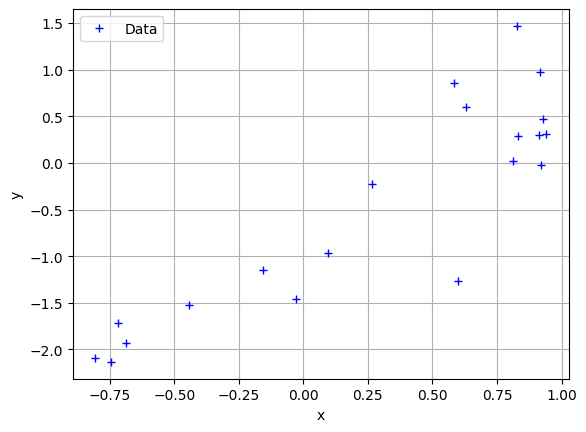

In [233]:
# Reading data
data_path = "../Exercise_05/t002c.csv"

data_np = np.loadtxt( data_path, dtype = np.float32, delimiter = "," )
data = torch.from_numpy( data_np )
data.requires_grad = True
 
# Visualizing the data 
plt.plot( data_np[ :, 0 ], data_np[ :, 1 ], 'b+', label = 'Data')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.show()

In [234]:
# Model function 
def model( x ):
    prediction = w*x + b
    return prediction

# Loss function (mean square error)
def loss_function( y_prediction, y ):
    loss = torch.mean( torch.square( y_prediction - y ) )
    return loss

In [235]:
# Setting initial data and process parameters
x_data = data[ :, 0 ]
y_data = data[ :, 1 ]

w = torch.randn( 1, requires_grad = True )
b = torch.randn( 1, requires_grad = True )

learning_rate = 0.05
epochs = 100
losses = np.zeros( ( epochs, 1 ), dtype = np.float32 )

In [236]:
# Running the learning process
for ii in range( epochs ):
    
    prediction = model( x_data )
    loss = loss_function( prediction, y_data )
    loss.backward()
    
    losses[ ii ] = loss.detach().numpy()
    
    with torch.no_grad():
        
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_()
        

Estimated parameters: 
w: 1.4769030809402466 
b: -0.8718742728233337 


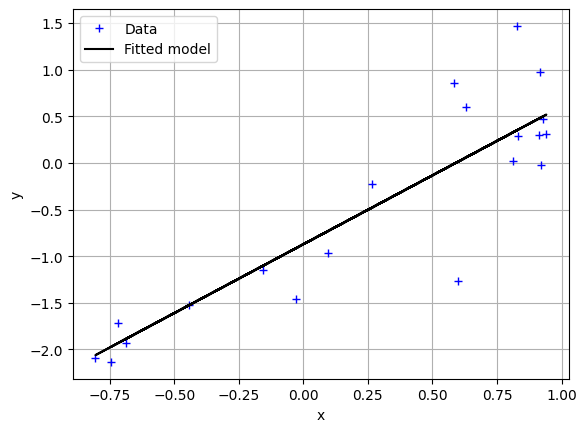

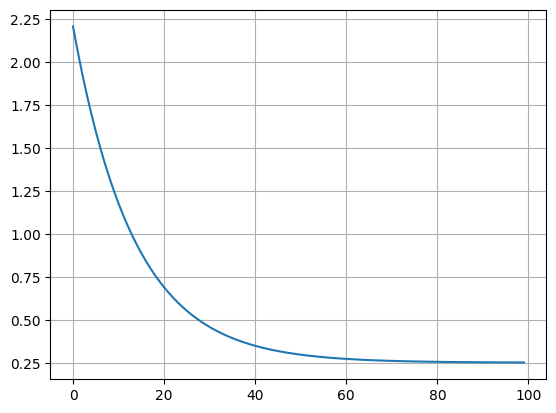

In [237]:
y_learned = ( w*x_data + b ).detach().numpy()

# Printing results
b = np.squeeze( b.detach().numpy() )
w = np.squeeze( w.detach().numpy() )

print( f"Estimated parameters: \nw: {w} \nb: {b} " )

# Plotting results
plt.plot( data_np[ :, 0 ], data_np[ :, 1 ], 'b+', label = 'Data')
plt.plot( data_np[ :, 0 ], y_learned, 'k-', label = 'Fitted model' )

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.show()

# Also the loss w.r.t to the number of epochs
plt.plot( range( epochs ), losses )

plt. grid()

plt.show()
